In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train=pd.read_csv('E:\\aqi_prediction\\prototype\\train.csv')
test=pd.read_csv('E:\\aqi_prediction\\prototype\\test.csv')

In [4]:
train.columns

Index(['City', 'PM2_5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [5]:
train.head()

,City,PM2_5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Delhi,91.8700,179.36,21.30000,30.010000,40.3100,31.790,10.10000,7.35000,34.780,9.72,16.21,15.64,290.00000
1,Other Cities,79.0400,143.38,6.19000,43.610000,28.2300,26.000,0.08000,8.67000,45.460,0.19,7.14,0.10,176.00000
2,Jaipur,23.1800,54.55,4.46000,17.090000,18.7100,24.620,0.58000,12.13000,42.340,0.64,0.89,0.82,68.00000
3,Ahmedabad,125.8585,141.54,80.04493,19.486141,31.9505,16.645,80.04493,64.65138,27.215,0.00,0.00,0.00,246.13783
4,Amritsar,24.0700,59.83,9.50000,9.990000,19.5000,13.000,0.67000,8.75000,13.370,1.91,2.89,2.00,85.00000


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20352\4065126174.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=train, x='City', y='AQI', estimator='mean', ci=None)


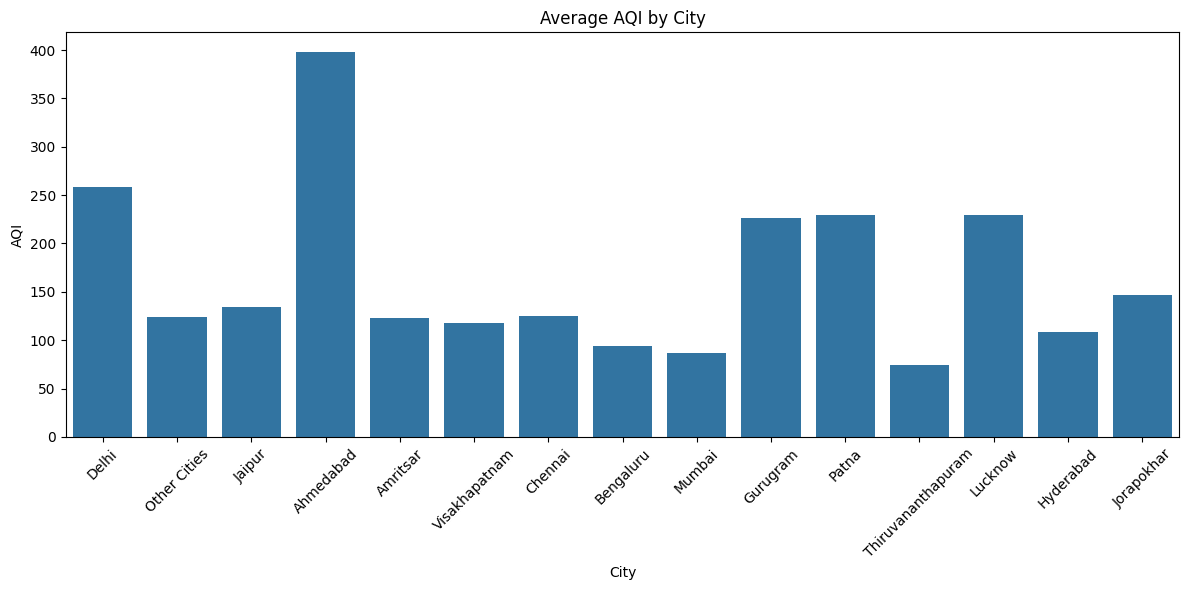

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=train, x='City', y='AQI', estimator='mean', ci=None)
plt.xticks(rotation=45)
plt.title('Average AQI by City')
plt.ylabel('AQI')
plt.tight_layout()
plt.show()

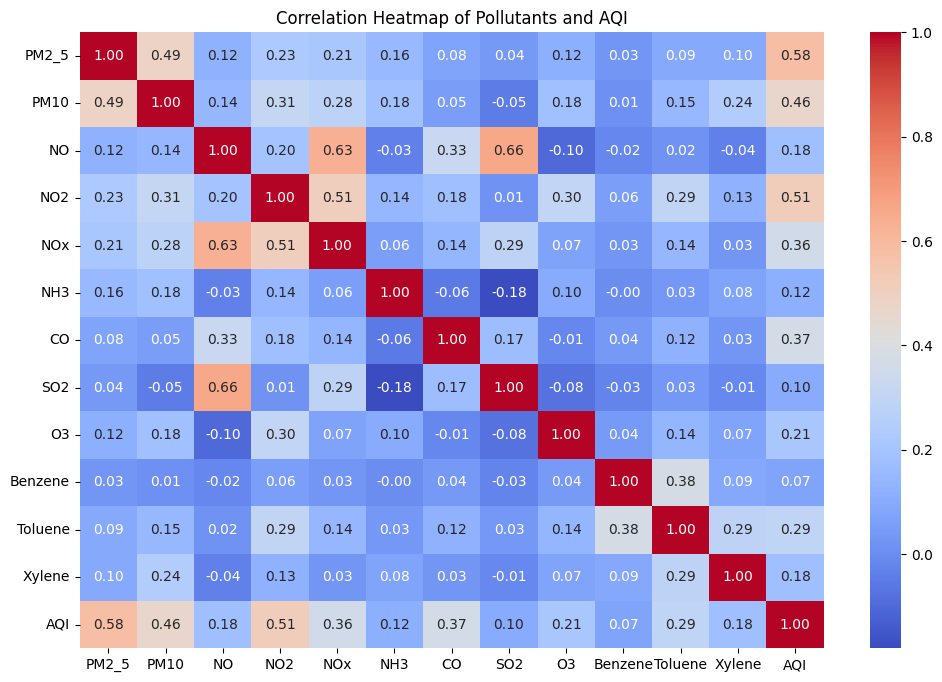

In [7]:
plt.figure(figsize=(12,8))
corr = train.drop(columns='City').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Pollutants and AQI')
plt.show()

In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#train data
X_train=train.drop('AQI', axis=1)
y_train=train['AQI']

numerical_features=X_train.select_dtypes(include=[np.number]).columns
categorical_features=X_train.select_dtypes(include=['object']).columns
numerical_pipeline=Pipeline(steps=[('scaler', StandardScaler())])
categorical_pipeline=Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('num', numerical_pipeline, numerical_features),('cat', categorical_pipeline, categorical_features)])
X_train_transformed = preprocessor.fit_transform(X_train)

#test data
X_test=test.drop('AQI', axis=1)
y_test=test['AQI']

numerical_features=X_test.select_dtypes(include=[np.number]).columns
categorical_features=X_test.select_dtypes(include=['object']).columns
numerical_pipeline=Pipeline(steps=[('scaler', StandardScaler())])
categorical_pipeline=Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('num', numerical_pipeline, numerical_features),('cat', categorical_pipeline, categorical_features)])
X_test_transformed = preprocessor.fit_transform(X_test)


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

model_lr = LinearRegression()
model_rf = RandomForestRegressor()
model_gb = GradientBoostingRegressor()
model_ada = AdaBoostRegressor()
model_dt = DecisionTreeRegressor()
model_xgb = XGBRegressor(verbosity=0)
model_cat = CatBoostRegressor(verbose=0)

models = [
    ("Linear Regression", model_lr),
    ("Random Forest", model_rf),
    ("Gradient Boosting", model_gb),
    ("AdaBoost", model_ada),
    ("Decision Tree", model_dt),
    ("XGBoost", model_xgb),
    ("CatBoost", model_cat)
]

for name, model in models:
    print(f"\nModel: {name}")
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    r2 = r2_score(y_test, y_pred)
    print(f"R-squared: {r2}")



Model: Linear Regression
R-squared: 0.7006349958378701

Model: Random Forest
R-squared: 0.8323031319118188

Model: Gradient Boosting
R-squared: 0.8849777205149211

Model: AdaBoost
R-squared: 0.3038811788722985

Model: Decision Tree
R-squared: 0.6983516078048436

Model: XGBoost
R-squared: 0.8683563535658256

Model: CatBoost
R-squared: 0.9022288102094375


In [44]:
models = [
    ("CatBoost", model_cat),
    ("XGBoost", model_xgb),
    ("Gradient Boosting", model_gb)
]

In [45]:
param_grid_cat = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8, 9],
    'learning_rate': [0.01, 0.05, 0.1],
}
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1]
}
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 8]
}
param_grid=[param_grid_cat, param_grid_xgb, param_grid_gb]

In [46]:
from sklearn.model_selection import GridSearchCV

for (name, model),param_grid in zip(models, param_grid):
    grid = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X_train_transformed, y_train)
    print("Best Params:", grid.best_params_)
    print("Best CV R² Score:", grid.best_score_)
    y_pred = grid.predict(X_test_transformed)
    r2 = r2_score(y_test, y_pred)
    print(f"Test R-squared: {r2}")
    print("\n")

Best Params: {'depth': 8, 'iterations': 300, 'learning_rate': 0.1}
Best CV R² Score: 0.8917679180103398
Test R-squared: 0.901802849467971


Best Params: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300}
Best CV R² Score: 0.8835199912148595
Test R-squared: 0.8714492820001435


Best Params: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200}
Best CV R² Score: 0.8851947267848805
Test R-squared: 0.8699564899496164




In [15]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

model = CatBoostRegressor(verbose=0, iterations=300, depth=8, learning_rate=0.1)
model.fit(X_train_transformed, y_train)

y_pred = model.predict(X_test_transformed)
r2 = r2_score(y_test, y_pred)
print(f"Test R-squared: {r2}")


Test R-squared: 0.901802849467971


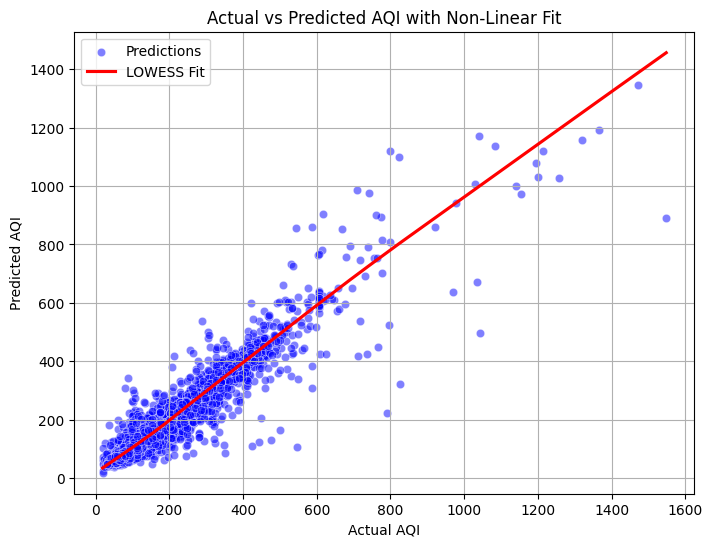

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, label='Predictions', color='blue')
sns.regplot(x=y_test, y=y_pred, scatter=False, lowess=True, color='red', label='LOWESS Fit')

plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI with Non-Linear Fit")
plt.legend()
plt.grid(True)
plt.show()